Varianza explicada por cada componente: [0.92461872 0.05306648]
Varianza total explicada: 0.977685206318795


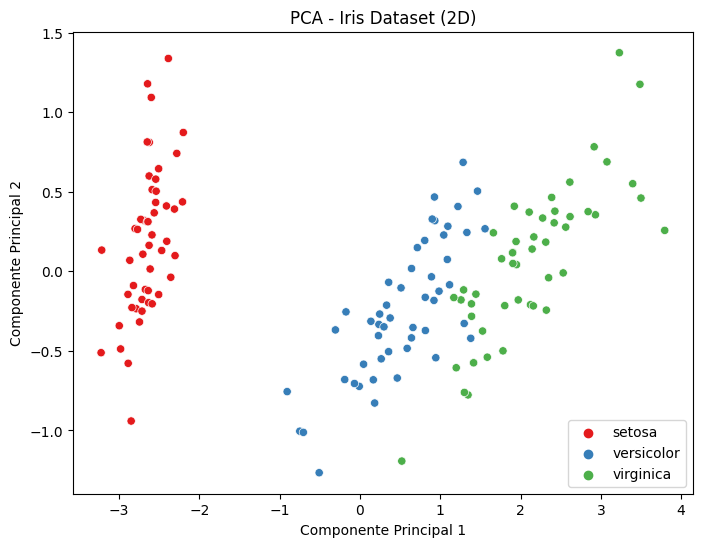


📊 Resultados de clasificación con PCA + Random Forest:
Accuracy: 0.9777777777777777

Matriz de Confusión:
 [[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]

Reporte de Clasificación:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.93      1.00      0.96        13
   virginica       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



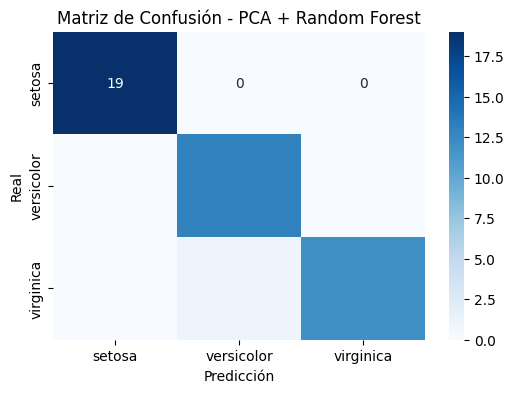

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ========================
# 1. Cargar dataset
# ========================
iris = load_iris()
X = iris.data
y = iris.target
labels = iris.target_names

# ========================
# 2. PCA (2 Componentes)
# ========================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

# ========================
# 3. Gráfica de PCA
# ========================
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=[labels[i] for i in y], palette="Set1")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Iris Dataset (2D)")
plt.show()

# ========================
# 4. Usar PCA + Clasificación
# ========================
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# ========================
# 5. Métricas
# ========================
print("\n📊 Resultados de clasificación con PCA + Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred, target_names=labels))

# ========================
# 6. Gráfica Matriz de Confusión
# ========================
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - PCA + Random Forest")
plt.show()


✅ Dataset generado y guardado en 'dataset.csv'
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  target
0  -2.420620   1.913421  -0.393981   1.596115   0.360609   1.273729       1
1   0.648682  -1.496119   0.433967  -1.652779   0.412009  -0.061788       0
2  -1.212280   1.088015   0.596644   1.223643  -0.080217  -0.407751       0
3  -1.127403   2.998418  -0.855331   1.811521  -1.355127   0.333268       1
4  -2.440910   3.071411   1.673938   2.592325  -0.473872   0.611461       1

📊 Varianza de cada característica:
feature_1    1.905395
feature_2    2.203287
feature_3    0.978362
feature_4    2.380949
feature_5    2.065234
feature_6    1.698392
dtype: float64

📊 Varianza explicada por cada componente PCA: [0.33302761 0.26847806]
🔢 Varianza total explicada: 0.6015056678189072


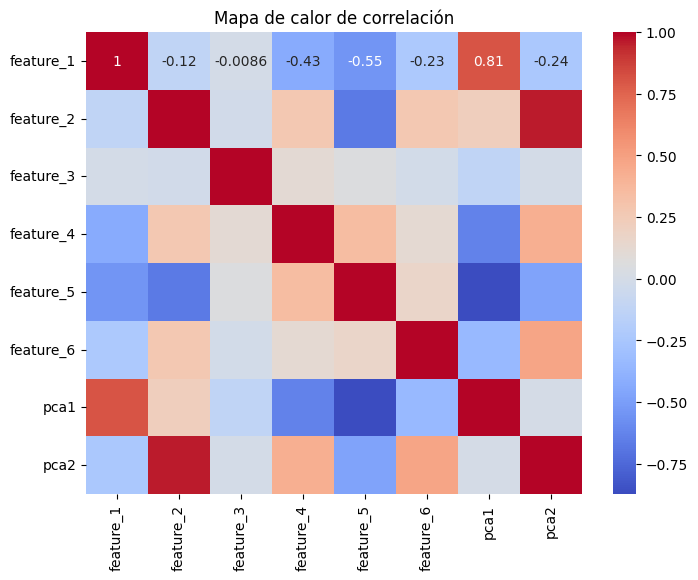

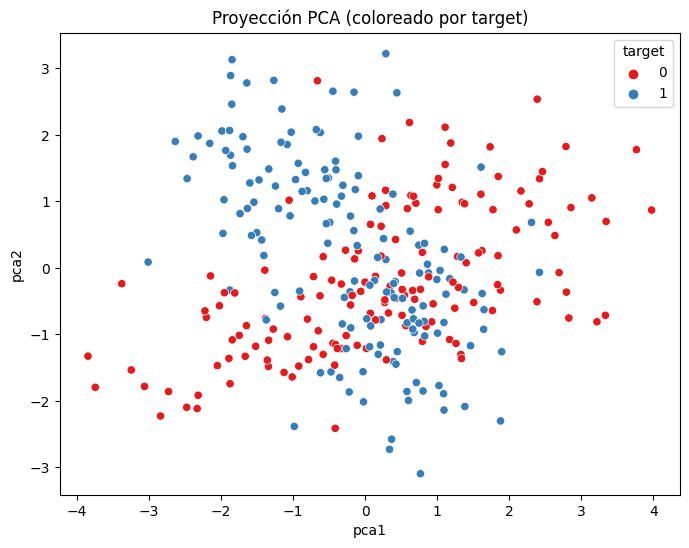

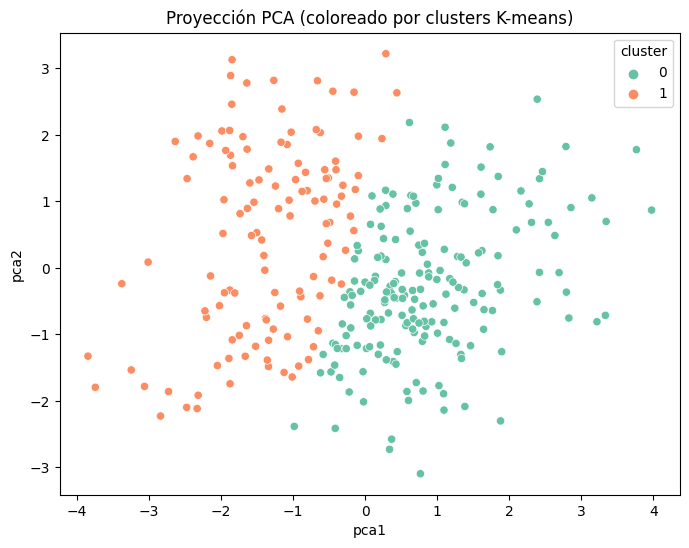

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 1. Generar dataset simulado
X, y = make_classification(n_samples=300, n_features=6, n_informative=4,
                           n_redundant=1, n_classes=2, random_state=42)

df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, 7)])
df["target"] = y
df.to_csv("dataset.csv", index=False)
print("✅ Dataset generado y guardado en 'dataset.csv'")
print(df.head())

# =============================
# 2. Preprocesamiento
# =============================

# Separar variables
X = df.drop("target", axis=1)
y = df["target"]

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Análisis de varianza (para ver importancia inicial de cada feature)
varianza = pd.Series(X.var(), index=X.columns)
print("\n📊 Varianza de cada característica:")
print(varianza)

# =============================
# 3. PCA (reducción de dimensionalidad)
# =============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\n📊 Varianza explicada por cada componente PCA:", pca.explained_variance_ratio_)
print("🔢 Varianza total explicada:", pca.explained_variance_ratio_.sum())

# =============================
# 4. K-means (detección de patrones ocultos)
# =============================
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df["cluster"] = clusters
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

# =============================
# 5. Gráficas de resultados
# =============================

# Correlación entre variables
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(["target", "cluster"], axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlación")
plt.show()

# PCA con colores por clase real
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["pca1"], y=df["pca2"], hue=df["target"], palette="Set1")
plt.title("Proyección PCA (coloreado por target)")
plt.show()

# PCA con colores por cluster detectado
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["pca1"], y=df["pca2"], hue=df["cluster"], palette="Set2")
plt.title("Proyección PCA (coloreado por clusters K-means)")
plt.show()
